<a href="https://colab.research.google.com/github/Alysonfiap/Projeto_fresco_alyson/blob/main/Projeto_fresco_alyson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O desafio é o seguinte: **

**Previsão de demanda é uma projeção realizada com o intuito de prever o potencial de vendas de um ou mais produtos em um cenário futuro. **

**Com base em dados e informações, numéricas e intencionais, o objetivo da previsão é aproximar ao máximo a perspectiva da realidade. Embora não seja possível determinar as ações do futuro, a estimativa permite guiar a tomada de decisão e elaborar um planejamento mais estratégico, voltado para as possibilidades reais do negócio.**

**Nos diversos setores, a previsão de demanda serve de amparo para nortear e orientar as ações mais importantes**

**Nós, da Frexco, trabalhamos com produtos perecíveis e muitos deles possuem uma data de validade curta. Acertar na previsão de demanda é essencial para evitarmos o desperdício de alimentos, além de também ser importante garantir que tenhamos o produto disponível no estoque para venda.**

**Tendo isso em mente, estruture um script no Python que calcule a previsão de demanda para os próximos 5 dias do item, baseando-se no histórico presente na base de dados em anexo.**

**O modelo de previsão pode ser o que você julgue ser o melhor, mas atenção aos detalhes de variação nas vendas!**

#Importando e instalando as biblitecas necessárias.

In [ ]:
import pandas as pd
!pip install pycaret-ts-alpha
!pip install matplotlib==3.1.3
from pycaret.time_series import *
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#Importando a base de dados.

In [19]:
base_vendas = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Dados.xlsx')

#Definindo a coluna data com index.

In [20]:
base_vendas.set_index('Data', drop= True, inplace= True)



#Analisando a base de dados.

<Figure size 720x360 with 0 Axes>

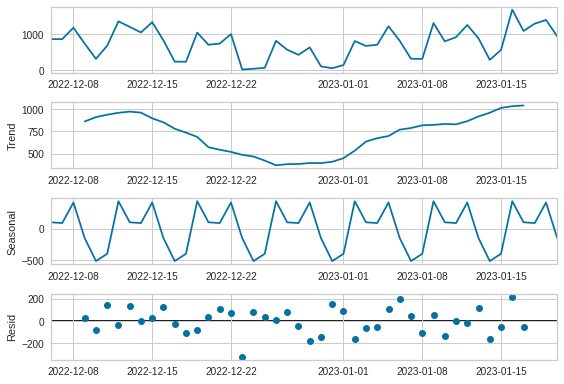

In [22]:
resultado = seasonal_decompose(base_vendas)
analise_base = plt.figure(figsize=(10,5))
analise_base = resultado.plot()



#Definindo a sazionalidade em dias e o tempo que queremos a previsão, no caso 5 dias.

In [23]:

setup(base_vendas, fh=5, fold=3, seasonal_period='D')

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: b9cb
INFO:logs:self.variable_keys: {'pipeline', 'fold_groups_param_full', 'display_container', 'X_test_transformed', '_all_models_internal', 'seasonality_present', 'seed', '_ml_usecase', 'exogenous_present', 'gpu_param', 'fh', 'primary_sp_to_use', 'X_test', 'idx', 'exp_id', 'enforce_exogenous', 'n_jobs_param', 'enforce_pi', 'strictly_positive', 'approach_type', 'y_train', 'html_param', 'y_test_transformed', 'variable_keys', 'log_plots_param', '_all_metrics', 'all_sp_values', '_available_plots', '_gpu_n_jobs_param', 'index_type', 'master_model_container', 'X_train', 'X_transformed', 'X_train_transformed', 'y_test', '_all_models', 'data', 'y_train_transformed', 'exp_name_log', 'X', 'y', 'y_transformed', 'logging_param', 'fold_param', 'seasonal_period', 'memory', 'USI', 'experiment__', 'fold

,Description,Value
0,session_id,7688
1,Target,Vendas
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(46, 1)"
5,Train data shape,"(41, 1)"
6,Test data shape,"(5, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.89s...............


#Comparar os modelos para ver qual é o melhor, nesse caso o modelo é o  auto_arima.

In [5]:
best_model = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,172.9283,214.2173,0.3111,0.316,0.6438,0.6498,0.5719,5.2300
arima,ARIMA,184.4749,237.6561,0.2802,0.3729,0.6929,0.7304,0.4361,0.2167
grand_means,Grand Means Forecaster,299.3238,359.2992,0.6609,0.4547,1.1251,1.0984,-0.0492,0.0200
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,217.7821,259.2546,0.3454,0.4717,0.8229,0.7948,0.4446,0.3633
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,228.8967,270.3598,0.3542,0.4835,0.8641,0.8286,0.3808,0.1000
snaive,Seasonal Naive Forecaster,229.7333,289.825,0.3498,0.4953,0.8724,0.8936,0.263,0.0233
croston,Croston,333.5471,381.0447,0.6275,0.5162,1.2531,1.1654,-0.1825,0.0233
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,269.9368,319.0003,0.4167,0.6286,1.0166,0.9741,0.1182,0.1867
ets,ETS,325.5166,381.2276,0.4361,0.6489,1.2339,1.1776,-0.4016,0.1167
theta,Theta Forecaster,326.849,385.618,0.4588,0.6635,1.2233,1.1813,-0.4586,0.0533


INFO:logs:master_model_container: 27
INFO:logs:display_container: 2
INFO:logs:AutoARIMA(random_state=1419, sp=7, suppress_warnings=True)
INFO:logs:compare_models() successfully completed......................................


#Criando o modelo auto_arima.

In [6]:
auto_arima = create_model ('auto_arima')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-12-31,194.0972,210.7622,0.4651,0.3372,0.7228,0.6495,0.6307
1,2023-01-05,99.0918,138.0050,0.1210,0.1305,0.3856,0.4322,0.8634
2,2023-01-10,225.5959,293.8845,0.3472,0.4804,0.8228,0.8675,0.2217
Mean,NaT,172.9283,214.2173,0.3111,0.3160,0.6438,0.6498,0.5719
SD,NaT,53.7705,63.6844,0.1428,0.1436,0.1870,0.1777,0.2653


INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:AutoARIMA(random_state=1419, sp=7, suppress_warnings=True)
INFO:logs:create_model() successfully completed......................................


#Finalizando o modelo e armazenando na variavel final.

In [7]:

final = finalize_model(auto_arima)
final

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fb63bf66a60>, estimator=AutoARIMA(random_state=1419, sp=7, suppress_warnings=True), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing AutoARIMA(random_state=1419, sp=7, suppress_warnings=True)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fb63bf66a60>, estimator=AutoARIMA(random_state=1419, sp=7, suppress_warnings=True), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:D

AutoARIMA(random_state=1419, sp=7, suppress_warnings=True)

##Trazendo o Gráfico de treino e teste.

In [15]:
plot_model(auto_arima, plot='train_test_split'    )

INFO:logs:Visual Rendered Successfully


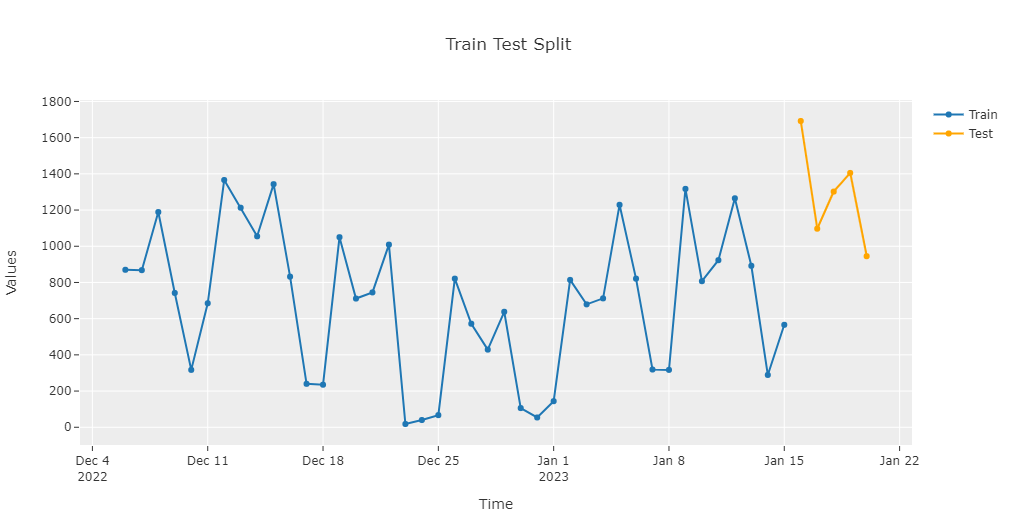

#Exibindo o modelo original e o modelo final com a predição.
nosso modelo preve que teremos:
Jan 21, **342 vendas**;
Jan 22, **619 vendas**;
Jan 23, **1745 vendas**;
Jan 24, **1150 vendas**;
Jan 25, **1355 vendas**.

In [11]:

plt.figure(figsize=(10,5))
result = plot_model(final, plot='forecast')


INFO:logs:Visual Rendered Successfully


<Figure size 720x360 with 0 Axes>

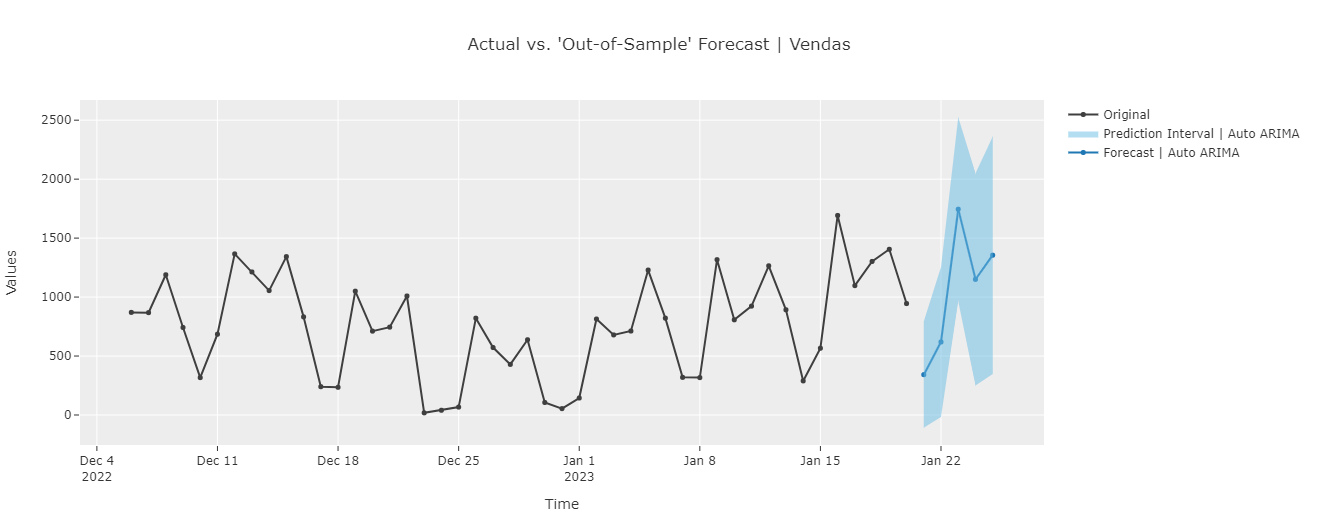